# Assignment-4

1.Download the Employee Attrition dataset

2.Preprocessing the data

3.Model building using Logistic regression, Decision tree and Random Forest

4.Calculate performance metrics

### 1. Importing libraries  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing dataset 

In [3]:
df = pd.read_csv("C:\Internship\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


### 3. Handling null values 

In [12]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 4. Data Visualization

<AxesSubplot:>

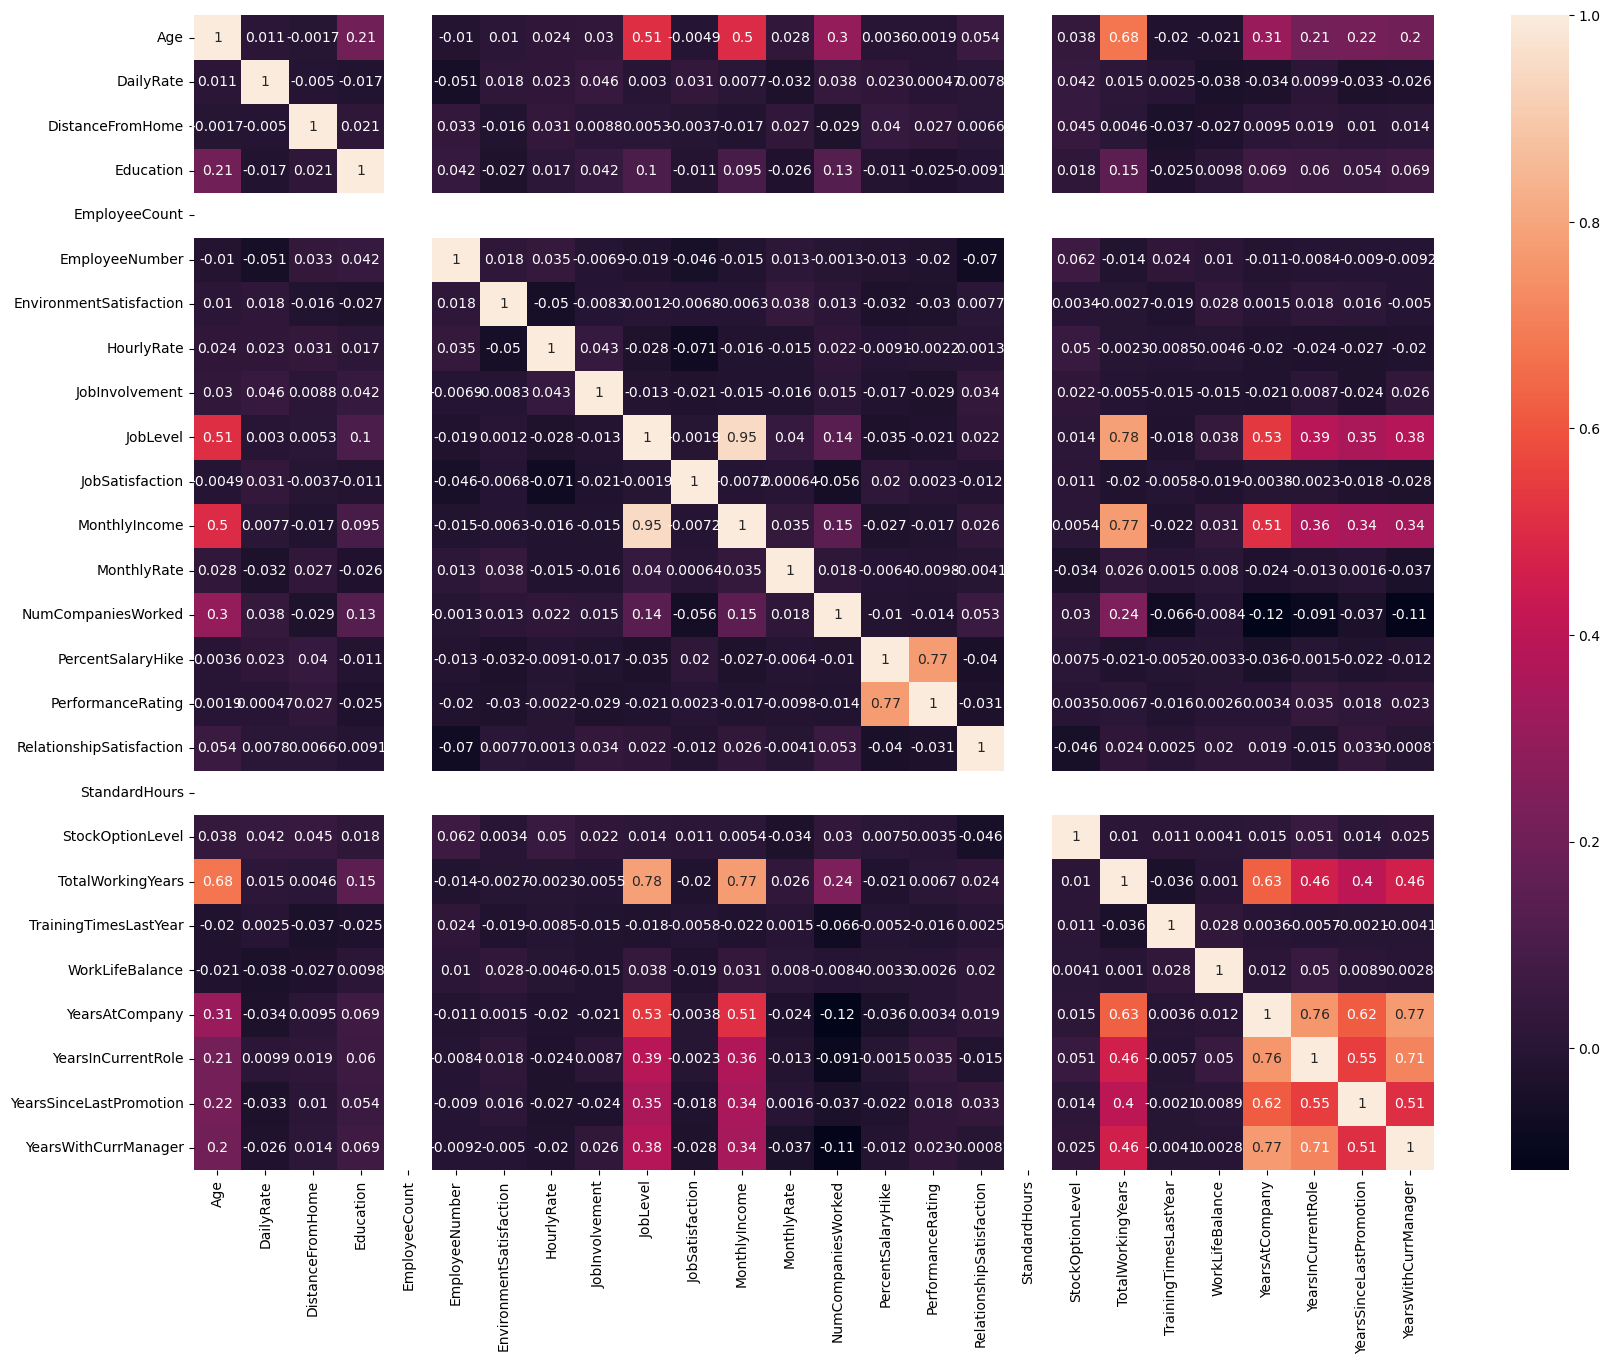

In [49]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [52]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
import warnings
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

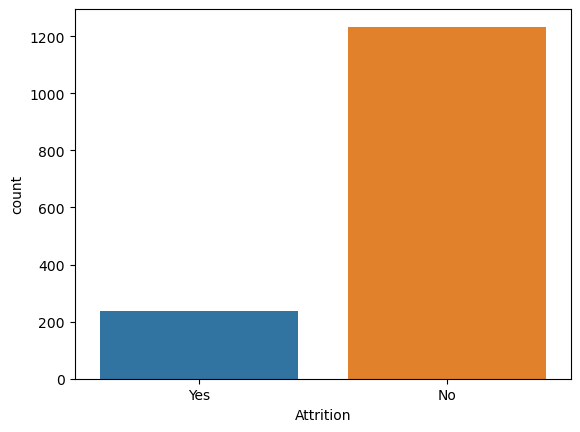

In [23]:
sns.countplot("Attrition",data=df)

From the above plot,it is clear that attrition rate is low.

<AxesSubplot:xlabel='Gender', ylabel='count'>

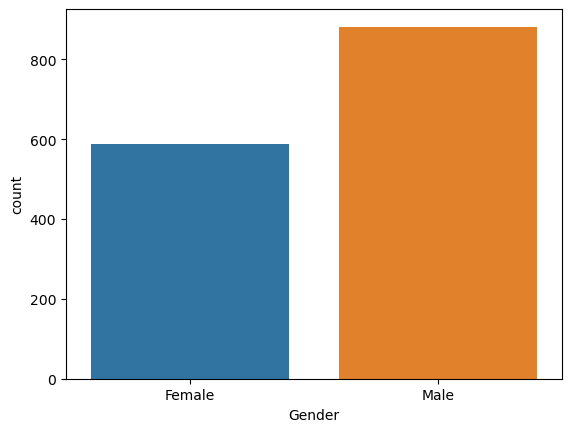

In [92]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

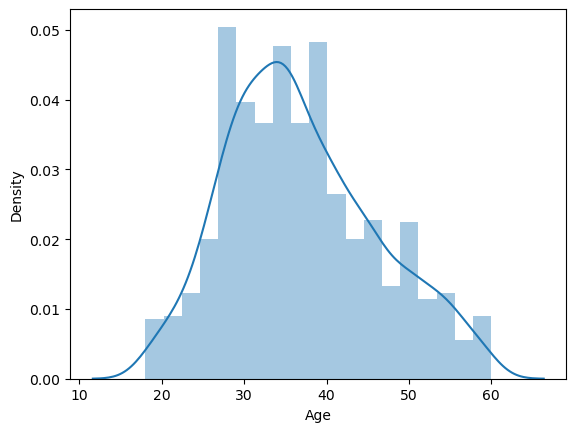

In [28]:
sns.distplot(df.Age)

In [44]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

Text(0.5, 1.0, 'Attrition with respect to Overtime')

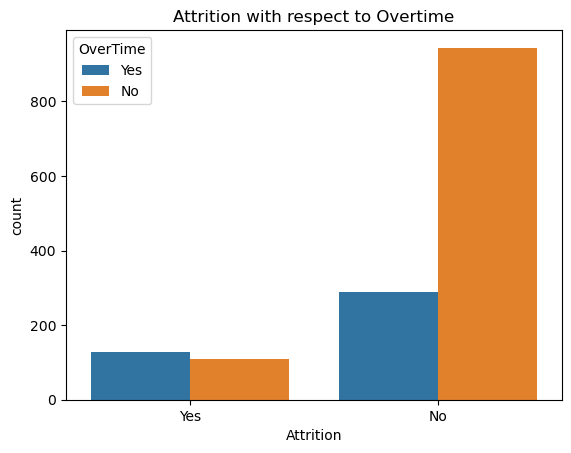

In [45]:
sns.countplot(x="Attrition",hue="OverTime",data=df)
plt.title("Attrition with respect to Overtime")

From the plot, we can say that turnover is high for the employees who work overtime

### 5. Outlier detection 

<AxesSubplot:xlabel='Age'>

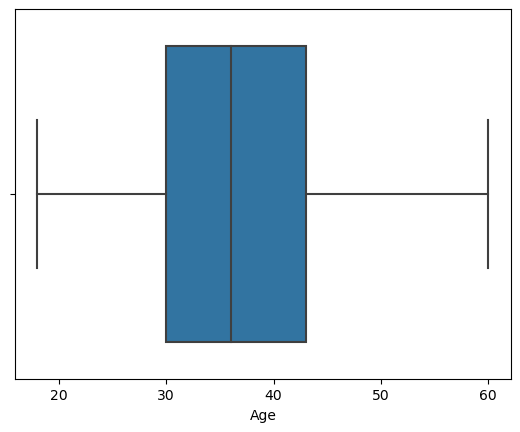

In [50]:
sns.boxplot(df.Age)

<AxesSubplot:xlabel='DistanceFromHome'>

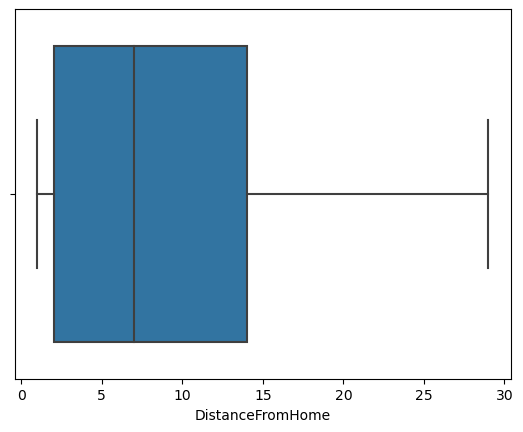

In [58]:
sns.boxplot(df.DistanceFromHome)

### 6.Splitting dependent and independent variables 

In [196]:
x=df.drop("Attrition",axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [73]:
x.shape

(1470, 34)

In [160]:
y=df.Attrition
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [75]:
y.shape

(1470,)

### 7. Feature Encoding 

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [200]:
x["BusinessTravel"] = le.fit_transform(x["BusinessTravel"])
x["Department"] = le.fit_transform(x["Department"])
x["EducationField"] = le.fit_transform(x["EducationField"])
x["Gender"] = le.fit_transform(x["Gender"])
x["JobRole"] = le.fit_transform(x["JobRole"])
x["MaritalStatus"] = le.fit_transform(x["MaritalStatus"])
x["Over18"] = le.fit_transform(x["Over18"])
x["OverTime"] = le.fit_transform(x["OverTime"])

In [201]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [99]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeCount             1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [81]:
mapping = dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Human Resources': 0,
 'Life Sciences': 1,
 'Marketing': 2,
 'Medical': 3,
 'Other': 4,
 'Technical Degree': 5}

### 8.Feature Scaling 

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [141]:
x_scaled = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_scaled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### 10.Splitting data into training and testing data 

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [146]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 34), (294, 34), (1176,), (294,))

### 11.Model Building 

#### Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [148]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [149]:
y_pred1 = lr_model.predict(x_test)

In [150]:
Attrition1 = pd.DataFrame({"Actual values":y_test,"Predicted":y_pred1})
Attrition1

,Actual values,Predicted
442,No,No
1091,No,No
981,Yes,No
785,No,No
1332,Yes,Yes
...,...,...
1439,No,No
481,No,No
124,Yes,Yes
198,No,No


### Evaluation of classification model 

In [151]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [195]:
print("Accuracy of Logistic regression model:",accuracy_score(y_test,y_pred1)*100)

Accuracy of Logistic regression model: 88.43537414965986


In [153]:
confusion_matrix(y_test,y_pred1)

array([[241,   4],
       [ 30,  19]], dtype=int64)

In [154]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

          No       0.89      0.98      0.93       245
         Yes       0.83      0.39      0.53        49

    accuracy                           0.88       294
   macro avg       0.86      0.69      0.73       294
weighted avg       0.88      0.88      0.87       294



### Decision tree 

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [115]:
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
y_pred2 = dtc_model.predict(x_test)

In [118]:
Attrition2 = pd.DataFrame({"Actual values":y_test,"Predicted":y_pred2})
Attrition2

,Actual values,Predicted
442,No,No
1091,No,No
981,Yes,No
785,No,No
1332,Yes,No
...,...,...
1439,No,No
481,No,No
124,Yes,No
198,No,No


### Evaluation

In [194]:
print("Accuracy of Decision tree model:",accuracy_score(y_test,y_pred2)*100)

Accuracy of Decision tree model: 74.48979591836735


In [167]:
confusion_matrix(y_test,y_pred2)

array([[203,  42],
       [ 33,  16]], dtype=int64)

In [168]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

          No       0.86      0.83      0.84       245
         Yes       0.28      0.33      0.30        49

    accuracy                           0.74       294
   macro avg       0.57      0.58      0.57       294
weighted avg       0.76      0.74      0.75       294



### Hyper parameter tuning 

[Text(0.3216440217391304, 0.9722222222222222, 'X[27] <= -1.257\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.07652173913043478, 0.9166666666666666, 'X[16] <= 0.552\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.04521739130434783, 0.8611111111111112, 'X[4] <= 0.902\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.02782608695652174, 0.8055555555555556, 'X[15] <= -1.114\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.01391304347826087, 0.75, 'X[17] <= -0.937\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.006956521739130435, 0.6944444444444444, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.020869565217391306, 0.6944444444444444, 'X[22] <= -1.014\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.01391304347826087, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02782608695652174, 0.6388888888888888, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.04173913043478261, 0.75, 'X[19] <= -0.878\ngini = 0.153\nsample

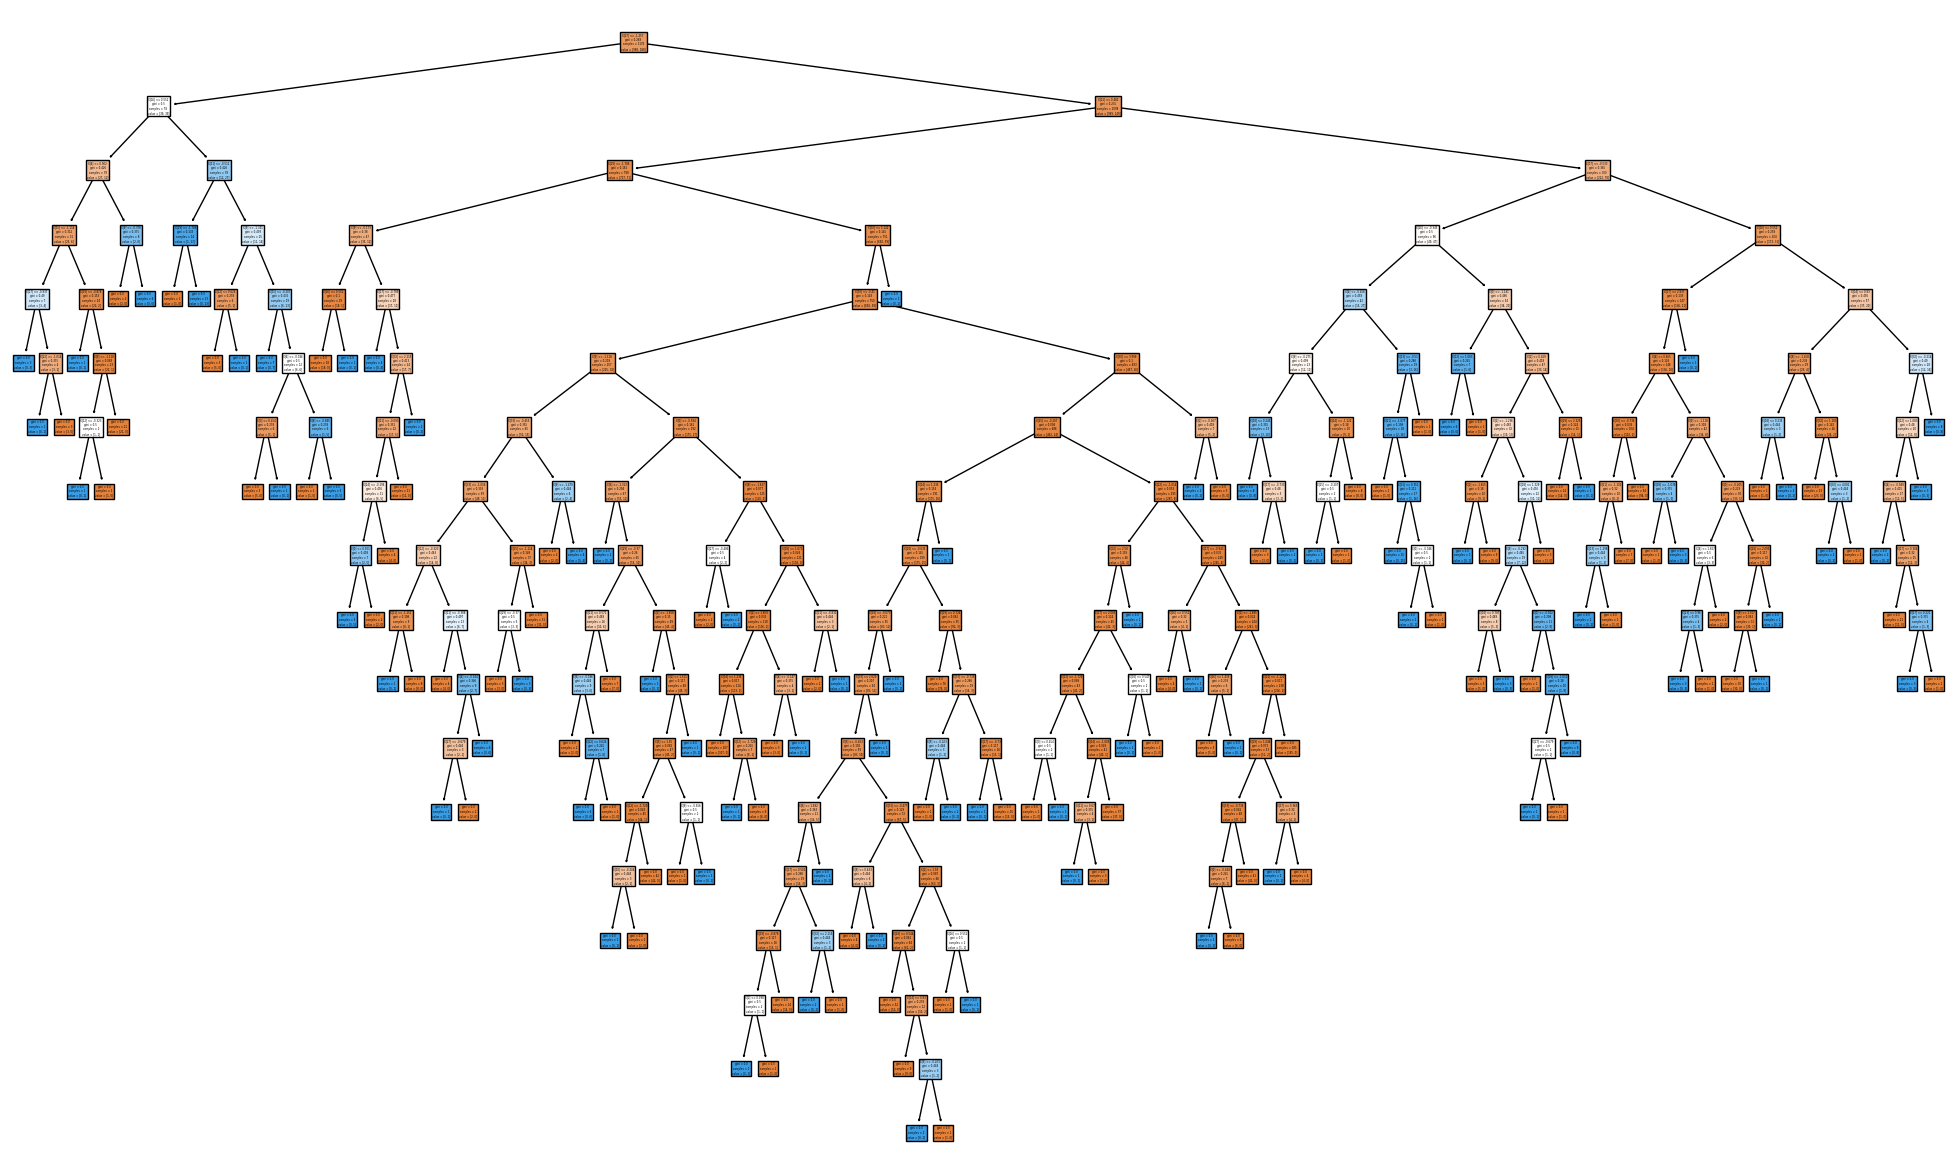

In [169]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc_model,filled=True)

In [171]:
from sklearn.model_selection import GridSearchCV
parameter ={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [172]:
grid_search=GridSearchCV(estimator=dtc_model,param_grid=parameter,cv=5,scoring="accuracy")

In [173]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [174]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [175]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [176]:
pred=dtc_cv.predict(x_test)

In [193]:
print("Accuracy of Decision tree model with hyper_parameter_tuning:",accuracy_score(y_test,pred)*100)

Accuracy of Decision tree model with hyper_parameter_tuning: 83.33333333333334


In [179]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.84      0.98      0.91       245
         Yes       0.50      0.08      0.14        49

    accuracy                           0.83       294
   macro avg       0.67      0.53      0.52       294
weighted avg       0.79      0.83      0.78       294



### Random forest classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [184]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [185]:
rfc_cv= GridSearchCV(rfc_model,param_grid=forest_params,cv=10,scoring="accuracy")

In [186]:
rfc_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [187]:
pred3 = rfc_cv.predict(x_test)

In [190]:
Attrition1 = pd.DataFrame({"Actual values":y_test,"Predicted":pred3})
Attrition1

,Actual values,Predicted
442,No,No
1091,No,No
981,Yes,No
785,No,No
1332,Yes,Yes
...,...,...
1439,No,No
481,No,No
124,Yes,No
198,No,No


In [192]:
print("Accuracy of Random forest model with hyper_parameter_tuning:",accuracy_score(y_test,pred3)*100)

Accuracy of Random forest model with hyper_parameter_tuning: 85.03401360544217


In [188]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

          No       0.86      0.98      0.92       245
         Yes       0.69      0.18      0.29        49

    accuracy                           0.85       294
   macro avg       0.77      0.58      0.60       294
weighted avg       0.83      0.85      0.81       294

